# Defining Base Class for Inheritance

In [1]:
# Python Object Oriented Programming by Joe Marini course example
# Understanding class inheritance


class Book:
    def __init__(self, title, author, pages, price):
        self.title = title
        self.price = price
        self.author = author
        self.pages = pages


class Magazine:
    def __init__(self, title, publisher, price, period):
        self.title = title
        self.price = price
        self.period = period
        self.publisher = publisher


class Newspaper:
    def __init__(self, title, publisher, price, period):
        self.title = title
        self.price = price
        self.period = period
        self.publisher = publisher


b1 = Book("Brave New World", "Aldous Huxley", 311, 29.0)
n1 = Newspaper("NY Times", "New York Times Company", 6.0, "Daily")
m1 = Magazine("Scientific American", "Springer Nature", 5.99, "Monthly")

print(b1.author)
print(n1.publisher)
print(b1.price, m1.price, n1.price)


Aldous Huxley
New York Times Company
29.0 5.99 6.0


For the above three classes, they are have some attributes in common:
- Book and Magazine all requires title and price
- Magazine and Newspaper all requires publisher and period
- ...

Therefore, we can define base class to group these shared attributes.

Base classes centralizes the common functionality, instead of having them duplicated across multiple classes 

In [3]:
class Publication:
    def __init__(self, title, price):
        self.title = title
        self.price = price

class Periodical(Publication):
    # Periodical inherits from Publicationz
    def __init__(self, title, price, period, publisher):
        super().__init__(title, price)
        self.period = period
        self.publisher = publisher
        
class Book(Publication):
    def __init__(self, title, author, pages, price):
        super().__init__(title, price)
        self.author = author
        self.pages = pages

class Magazine(Periodical):
    def __init__(self, title, publisher, price, period):
        super().__init__(title, price, period, publisher)

class Newpaper(Periodical):
    def __init__(self, title, publisher, price, period):
        super().__init__(title, price, period, publisher)

b1 = Book("Brave New World", "Aldous Huxley", 311, 29.0)
n1 = Newspaper("NY Times", "New York Times Company", 6.0, "Daily")
m1 = Magazine("Scientific American", "Springer Nature", 5.99, "Monthly")

print(b1.author)
print(n1.publisher)
print(b1.price, m1.price, n1.price)


Aldous Huxley
New York Times Company
29.0 5.99 6.0


Note that the above two code cells produce the same result, but the one below which defines base classes and assignining appropriate inheritance have much better code organization.

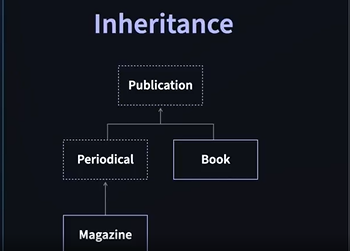

# Abstract Base Class

Base Class serves as a template for other class to inherit from.
Abstract Base Class are Base Class with extra constraints
- Users should not create an instance of the base class itself.
- Enforce certain methods in the base class that must be implemented in subclasses


In [1]:
# Python Object Oriented Programming by Joe Marini course example
# Using Abstract Base Classes to enforce class constraints


class GraphicShape:
    def __init__(self):
        super().__init__()

    def calcArea(self):
        pass


class Circle(GraphicShape):
    def __init__(self, radius):
        self.radius = radius


class Square(GraphicShape):
    def __init__(self, side):
        self.side = side


g = GraphicShape()

c = Circle(10)
print(c.calcArea())
s = Square(12)
print(s.calcArea())


None
None


In the above example, we want
- each subclass that inherites the GraphicShape class to have calcArea implemented
- there should be no instance of GraphicShape() initiated (which `g` variable should be not initialized)

In [5]:
# Python Object Oriented Programming by Joe Marini course example
# Using Abstract Base Classes to enforce class constraints

from abc import ABC, abstractmethod
class GraphicShape(ABC): # make the base class inherites from ABD
    def __init__(self):
        super().__init__()
    
    @abstractmethod 
    # With this decorator, if the following subclass does not define calcArea,
    # there will be an error
    def calcArea(self):
        pass


class Circle(GraphicShape):
    def __init__(self, radius):
        self.radius = radius
    

class Square(GraphicShape):
    def __init__(self, side):
        self.side = side


g = GraphicShape()

c = Circle(10)
print(c.calcArea())
s = Square(12)
print(s.calcArea())


TypeError: Can't instantiate abstract class GraphicShape with abstract method calcArea

The above is getting error as GraphicShape instance should not be intialized

In [6]:
# Python Object Oriented Programming by Joe Marini course example
# Using Abstract Base Classes to enforce class constraints

from abc import ABC, abstractmethod
class GraphicShape(ABC): # make the base class inherites from ABD
    def __init__(self):
        super().__init__()
    
    @abstractmethod 
    # With this decorator, if the following subclass does not define calcArea,
    # there will be an error
    def calcArea(self):
        pass


class Circle(GraphicShape):
    def __init__(self, radius):
        self.radius = radius
    

class Square(GraphicShape):
    def __init__(self, side):
        self.side = side


#g = GraphicShape()

c = Circle(10)
print(c.calcArea())
s = Square(12)
print(s.calcArea())


TypeError: Can't instantiate abstract class Circle with abstract method calcArea

The above is getting error as no calcArea is implemented in the Circle class

In [8]:
# Python Object Oriented Programming by Joe Marini course example
# Using Abstract Base Classes to enforce class constraints

from abc import ABC, abstractmethod
class GraphicShape(ABC): # make the base class inherites from ABD
    def __init__(self):
        super().__init__()
    
    @abstractmethod 
    # With this decorator, if the following subclass does not define calcArea,
    # there will be an error
    def calcArea(self):
        pass


class Circle(GraphicShape):
    def __init__(self, radius):
        self.radius = radius
    def calcArea(self):
        return (self.radius ** 2) * 3.14 
    

class Square(GraphicShape):
    def __init__(self, side):
        self.side = side
    
    def calcArea(self):
        return self.side ** 2


#g = GraphicShape()

c = Circle(10)
print(c.calcArea())
s = Square(12)
print(s.calcArea())


314.0
144


# Multiple Inheritance Class

In [10]:
# Python Object Oriented Programming by Joe Marini course example
# Understanding multiple inheritance


class A:
    def __init__(self):
        super().__init__()
        self.foo = "foo"


class B:
    def __init__(self):
        super().__init__()
        self.bar = "bar"


class C(A, B):
    def __init__(self):
        super().__init__()
        
    def showprops(self):
        print(self.foo)
        print(self.bar)

c = C()
c.showprops()


foo
bar


One class could inherites from more than one classes

In [11]:
# Python Object Oriented Programming by Joe Marini course example
# Understanding multiple inheritance


class A:
    def __init__(self):
        super().__init__()
        self.foo = "foo"
        self.name = "class A"


class B:
    def __init__(self):
        super().__init__()
        self.bar = "bar"
        self.name = "class B"


class C(A, B):
    def __init__(self):
        super().__init__()
        
    def showprops(self):
        print(self.foo)
        print(self.bar)
        print(self.name)

c = C()
c.showprops()


foo
bar
class A


If the classes this current class inherites from has the same name for an attribute then the class listed at the left side in the `class C(A, B)` class definition will be used.

In [13]:
# The order of which class' attributes will be used first can be seen over
C.__mro__

(__main__.C, __main__.A, __main__.B, object)

# Composition

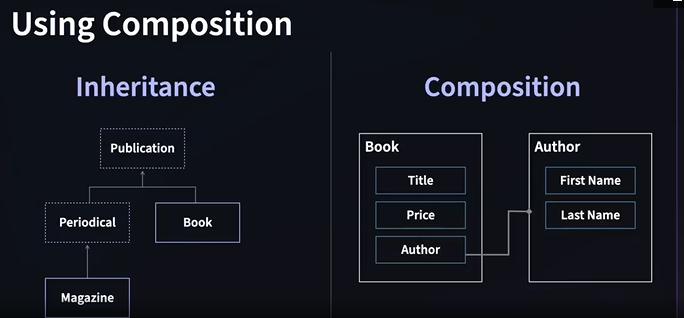

In [ ]:
# Python Object Oriented Programming by Joe Marini course example
# Using composition to build complex objects


class Book:
    def __init__(self, title, price, authorfname, authorlname):
        self.title = title
        self.price = price

        self.authorfname = authorfname
        self.authorlname = authorlname

        self.chapters = []

    def addchapter(self, name, pages):
        self.chapters.append((name, pages))


b1 = Book("War and Peace", 39.0, "Leo", "Tolstoy")

b1.addchapter("Chapter 1", 125)
b1.addchapter("Chapter 2", 97)
b1.addchapter("Chapter 3", 143)

print(b1.title)


We want to create a separate Author class to collect all authors so that we don't clutter Book class with too much info

In [ ]:
# Python Object Oriented Programming by Joe Marini course example
# Using composition to build complex objects


class Book:
    def __init__(self, title, price, author=None):
        self.title = title
        self.price = price

        self.author =author

        self.chapters = []

    def addchapter(self, name, pages):
        self.chapters.append((name, pages))

class Author:
    def __init__(self, fname, lname):
        self.fname = fname
        self.lname = lname
        
    def __str__(self):
        return f"{self.fname} {self.lname}"


b1 = Book("War and Peace", 39.0, "Leo", "Tolstoy")

b1.addchapter("Chapter 1", 125)
b1.addchapter("Chapter 2", 97)
b1.addchapter("Chapter 3", 143)

print(b1.title)


We can do the same thing with chapter as well

In [15]:
# Python Object Oriented Programming by Joe Marini course example
# Using composition to build complex objects


class Book:
    def __init__(self, title, price, author=None):
        # the author here is a class
        self.title = title
        self.price = price

        self.author =author

        self.chapters = []

    def addchapter(self, chapter):
        # the chapter here is a class
        self.chapters.append(chapter)
    
    def getbookpagecount(self):
        result = 0
        for ch in self.chapters:
            result += ch.pagecount
        return result
            

class Author:
    def __init__(self, fname, lname):
        self.fname = fname
        self.lname = lname
        
    def __str__(self):
        return f"{self.fname} {self.lname}"

class Chapter:
    def __init__(self, name, pagecount):
        self.name = name
        self.pagecount = pagecount
    
    
author = Author("Leo", "Tolstoy")


b1 = Book("War and Peace", 39.0, author)

b1.addchapter(Chapter("Chapter 1", 125))
b1.addchapter(Chapter("Chapter 2", 97))
b1.addchapter(Chapter("Chapter 3", 143))

print(b1.title)
print(b1.author)
print(b1.getbookpagecount())


War and Peace
Leo Tolstoy
365


In [39]:
# Python Object Oriented Programming by Joe Marini course example
# Programming challenge: use inheritance and abstract classes

# Challenge: create a class structure to represent stocks and bonds
# Requirements:
# -- Both stocks and bonds have a price
# -- Stocks have a company name and ticker
# -- Bonds have a description, duration, and yield
# -- You should not be able to instantiate the base class
# -- Subclasses are required to override get_description()
# -- get_description returns formats for stocks and bonds
# For stocks: "Ticker: Company -- $Price"
# For bonds: "description: duration'yr' : $price : yieldamt%"

from abc import ABC, abstractmethod
class Asset(ABC):
    def __init__(self, price):
        self.price = price
    
    @abstractmethod
    def get_description(self):
        pass

class Stock(Asset):
    def __init__(self, name, price, ticker):
        super().__init__(price)
        self.name = name
        self.ticker = ticker
    def get_description(self):
        return f"{self.ticker}:{self.name} -- ${self.price} "

class Bond(Asset):
    def __init__(self, price, description, duration, yieldamt):
        super().__init__(price)
        self.description = description
        self.duration = duration
        self.yieldamt = yieldamt
    def get_description(self):
        return f"{self.description}:{self.duration}'yr' : ${self.price} : {self.yieldamt}%"


# ~~~~~~~~~ TEST CODE ~~~~~~~~~
try:
   ast = Asset(100.0)
except:
   print("Can't instantiate Asset!")


msft = Stock("MSFT", 342.0, "Microsoft Corp")
goog = Stock("GOOG", 135.0, "Google Inc")
meta = Stock("META", 275.0, "Meta Platforms Inc")
amzn = Stock("AMZN", 135.0, "Amazon Inc")

us30yr = Bond(95.31, "30 Year US Treasury", 30, 4.38)
us10yr = Bond(96.70, "10 Year US Treasury", 10, 4.28)
us5yr = Bond(98.65, "5 Year US Treasury", 5, 4.43)
us2yr = Bond(99.57, "2 Year US Treasury", 2, 4.98)

print(msft.get_description())
print(goog.get_description())
print(meta.get_description())
print(amzn.get_description())

print(us30yr.get_description())
print(us10yr.get_description())
print(us5yr.get_description())
print(us2yr.get_description())

Can't instantiate Asset!
Microsoft Corp:MSFT -- $342.0 
Google Inc:GOOG -- $135.0 
Meta Platforms Inc:META -- $275.0 
Amazon Inc:AMZN -- $135.0 
30 Year US Treasury:30'yr' : $95.31 : 4.38%
10 Year US Treasury:10'yr' : $96.7 : 4.28%
5 Year US Treasury:5'yr' : $98.65 : 4.43%
2 Year US Treasury:2'yr' : $99.57 : 4.98%
